In [ ]:
!pip install requests

In [ ]:
!pip install beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:



url = 'https://fbref.com/en/comps/9/2021-2022/2021-2022-Premier-League-Stats'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Print the content of the response (HTML content in this case)
    print(response.text)
else:
    print("Failed to retrieve data. Status code:", response.status_code)


    
      
<!DOCTYPE html>
<html data-version="klecko-" data-root="/home/fb/deploy/www/base" lang="en" class="no-js" >
<head>
    <meta charset="utf-8">
    <meta http-equiv="x-ua-compatible" content="ie=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />
    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202403142" />
<!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->
<script type="text/javascript" async=true>
(function() {
  var host = window.location.hostname;
  var element = document.createElement('script');
  var firstScript = document.getElementsByTagName('script')[0];
  var url = 'https://cmp.inmobi.com'
    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js?tag_version=V3');
  var uspTries = 0;
  var uspTriesLimit = 3;
  element.async = true;
  element.type = 'text/javascript';
  element.src = url;

  firstScript.parentNode.insertBefore(element, firstScript);

  function makeStub() {
    var TCF_

In [ ]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find elements by tag
title_tag = soup.find('title')
print("Title:", title_tag.text.strip() if title_tag else "Title not found")

league_table = soup.find('table', class_='stats_table')

if league_table:
# Print the league table
      print(league_table)
else:
      print("League table not found on the page.")

Title: 2021-2022 Premier League Stats | FBref.com
<table class="stats_table sortable min_width force_mobilize" data-cols-to-freeze=",2" id="results2021-202291_overall"> <caption>Regular season Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc center" data-stat="team

In [ ]:
# Extract the table rows
rows = league_table.find_all('tr')
# Define empty lists to store the data
data = []

# Extract data from each row
for row in rows:
    # Extract cells from the row
    cells = row.find_all(['th', 'td'])

    # Extract text from each cell
    row_data = [cell.get_text(strip=True) for cell in cells]
    # Append row data to the list
    data.append(row_data)
print(data)

[['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes'], ['1', 'Manchester City', '38', '29', '6', '3', '99', '26', '+73', '93', '2.45', '88.7', '24.6', '+64.0', '+1.68', '52,774', 'Kevin De Bruyne-15', 'Ederson', '→ Champions League via league finish'], ['2', 'Liverpool', '38', '28', '8', '2', '94', '26', '+68', '92', '2.42', '88.7', '33.8', '+54.9', '+1.45', '53,352', 'Mohamed Salah-23', 'Alisson', '→ Champions League via league finish'], ['3', 'Chelsea', '38', '21', '11', '6', '76', '33', '+43', '74', '1.95', '63.4', '33.2', '+30.1', '+0.79', '36,443', 'Mason Mount-11', 'Edouard Mendy', '→ Champions League via league finish'], ['4', 'Tottenham', '38', '22', '5', '11', '69', '40', '+29', '71', '1.87', '61.2', '39.3', '+21.9', '+0.58', '56,523', 'Son Heung-min-23', 'Hugo Lloris', '→ Champions League via league finish'], ['5', 'Arsenal', '38', '22', '3', '13', '61', '48', '+13', '69',

In [ ]:
# Convert the list of data into a pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])
print(df)

    Rk            Squad  MP   W   D   L  GF  GA   GD Pts Pts/MP    xG   xGA  \
0    1  Manchester City  38  29   6   3  99  26  +73  93   2.45  88.7  24.6   
1    2        Liverpool  38  28   8   2  94  26  +68  92   2.42  88.7  33.8   
2    3          Chelsea  38  21  11   6  76  33  +43  74   1.95  63.4  33.2   
3    4        Tottenham  38  22   5  11  69  40  +29  71   1.87  61.2  39.3   
4    5          Arsenal  38  22   3  13  61  48  +13  69   1.82  60.5  45.7   
5    6   Manchester Utd  38  16  10  12  57  57    0  58   1.53  55.8  53.0   
6    7         West Ham  38  16   8  14  60  51   +9  56   1.47  51.4  53.5   
7    8   Leicester City  38  14  10  14  62  59   +3  52   1.37  47.8  59.3   
8    9         Brighton  38  12  15  11  42  44   -2  51   1.34  46.2  42.9   
9   10           Wolves  38  15   6  17  38  43   -5  51   1.34  37.5  56.9   
10  11    Newcastle Utd  38  13  10  15  44  62  -18  49   1.29  38.1  57.1   
11  12   Crystal Palace  38  11  15  12  50  46   +4

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicated rows
duplicated_rows = df[df.duplicated()]
print("Duplicated rows:\n", duplicated_rows)

Missing values:
 Rk                 0
Squad              0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/MP             0
xG                 0
xGA                0
xGD                0
xGD/90             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
Notes              0
dtype: int64
Duplicated rows:
 Empty DataFrame
Columns: [Rk, Squad, MP, W, D, L, GF, GA, GD, Pts, Pts/MP, xG, xGA, xGD, xGD/90, Attendance, Top Team Scorer, Goalkeeper, Notes]
Index: []


In [ ]:
# Get the type of columns
column_types = df.dtypes
print("Column types:\n", column_types)

Column types:
 Rk                 object
Squad              object
MP                 object
W                  object
D                  object
L                  object
GF                 object
GA                 object
GD                 object
Pts                object
Pts/MP             object
xG                 object
xGA                object
xGD                object
xGD/90             object
Attendance         object
Top Team Scorer    object
Goalkeeper         object
Notes              object
dtype: object


In [ ]:
# Loop through each column
for column in df.columns:
    unique_values = df[column].unique()
    print("Column:", column)
    print("Unique values:", unique_values)
    print("Data type:", df[column].dtype)
    print("----------------------")


Column: Rk
Unique values: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20']
Data type: object
----------------------
Column: Squad
Unique values: ['Manchester City' 'Liverpool' 'Chelsea' 'Tottenham' 'Arsenal'
 'Manchester Utd' 'West Ham' 'Leicester City' 'Brighton' 'Wolves'
 'Newcastle Utd' 'Crystal Palace' 'Brentford' 'Aston Villa' 'Southampton'
 'Everton' 'Leeds United' 'Burnley' 'Watford' 'Norwich City']
Data type: object
----------------------
Column: MP
Unique values: ['38']
Data type: object
----------------------
Column: W
Unique values: ['29' '28' '21' '22' '16' '14' '12' '15' '13' '11' '9' '7' '6' '5']
Data type: object
----------------------
Column: D
Unique values: ['6' '8' '11' '5' '3' '10' '15' '7' '13' '14']
Data type: object
----------------------
Column: L
Unique values: ['3' '2' '6' '11' '13' '12' '14' '17' '15' '18' '19' '16' '21' '27' '26']
Data type: object
----------------------
Column: GF
Unique values: ['99' '94' '76' '

In [ ]:
#columns
print(df.keys())

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')


In [ ]:
#Removing comma from the cells
df['Attendance'] = df['Attendance'].str.replace(',', '')
print(df['Attendance'])



0     52774
1     53352
2     36443
3     56523
4     59665
5     73150
6     58370
7     32493
8     30966
9     30841
10    51487
11    24588
12    16918
13    41681
14    30134
15    38446
16    36308
17    19278
18    20614
19    26836
Name: Attendance, dtype: object


In [ ]:
#Splitting the column Top Team Scorer into two different columns
df[ 'Top Team Scorer Name'] = ''
df[ 'Top Team Scorer Score'] = ''
for index, row in df.iterrows():
    split_parts = row['Top Team Scorer'].split('-')

    # Assign the split parts to new columns 'Top Team Scorer Name' and 'Top Team Scorer Score'
    df.at[index, 'Top Team Scorer Name'] = split_parts[0]
    df.at[index, 'Top Team Scorer Score'] = split_parts[-1]



In [ ]:
df.drop('Top Team Scorer', axis=1, inplace=True)


In [ ]:
print(df[['Top Team Scorer Name','Top Team Scorer Score']])

            Top Team Scorer Name Top Team Scorer Score
0                Kevin De Bruyne                    15
1                  Mohamed Salah                    23
2                    Mason Mount                    11
3                      Son Heung                    23
4                    Bukayo Saka                    11
5              Cristiano Ronaldo                    18
6                   Jarrod Bowen                    12
7                    Jamie Vardy                    15
8   Leandro Trossard,Neal Maupay                     8
9                   Raúl Jiménez                     6
10                 Callum Wilson                     8
11                 Wilfried Zaha                    14
12                    Ivan Toney                    12
13                 Ollie Watkins                    11
14                    James Ward                    10
15                   Richarlison                    10
16                      Raphinha                    11
17        

In [ ]:
#changing type of number values to integer
df[['Rk','MP','W','D','L','GF','GA','GD','Pts','Attendance','Top Team Scorer Score']] = df[['Rk','MP','W','D','L','GF','GA','GD','Pts','Attendance','Top Team Scorer Score']].astype(int)


In [ ]:
#changing type of float values to float
df[['Pts/MP','xG','xGA','xGD','xGD/90']] =df[['Pts/MP','xG','xGA','xGD','xGD/90']].astype(float)

In [ ]:
import numpy as np

# Define a function to determine match outcomes based on goal difference
def determine_match_outcome(gd):
    if gd > 0:
        return 'Win'
    elif gd < 0:
        return 'Loss'
    else:
        return 'Draw'

# Apply the function to create a new column representing match outcomes
df['MatchOutcome'] = df.apply(lambda row: determine_match_outcome(row['GD']), axis=1)


In [ ]:
print(df['Rk'])

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: Rk, dtype: int64


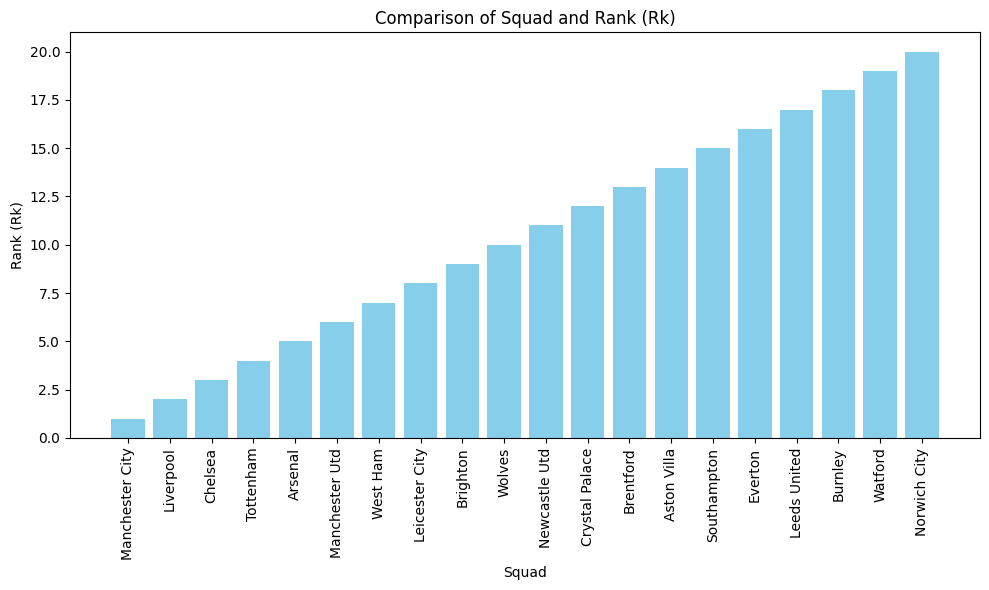

In [ ]:
import matplotlib.pyplot as plt


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Squad'], df['Rk'], color='skyblue')
plt.xlabel('Squad')
plt.ylabel('Rank (Rk)')
plt.title('Comparison of Squad and Rank (Rk)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

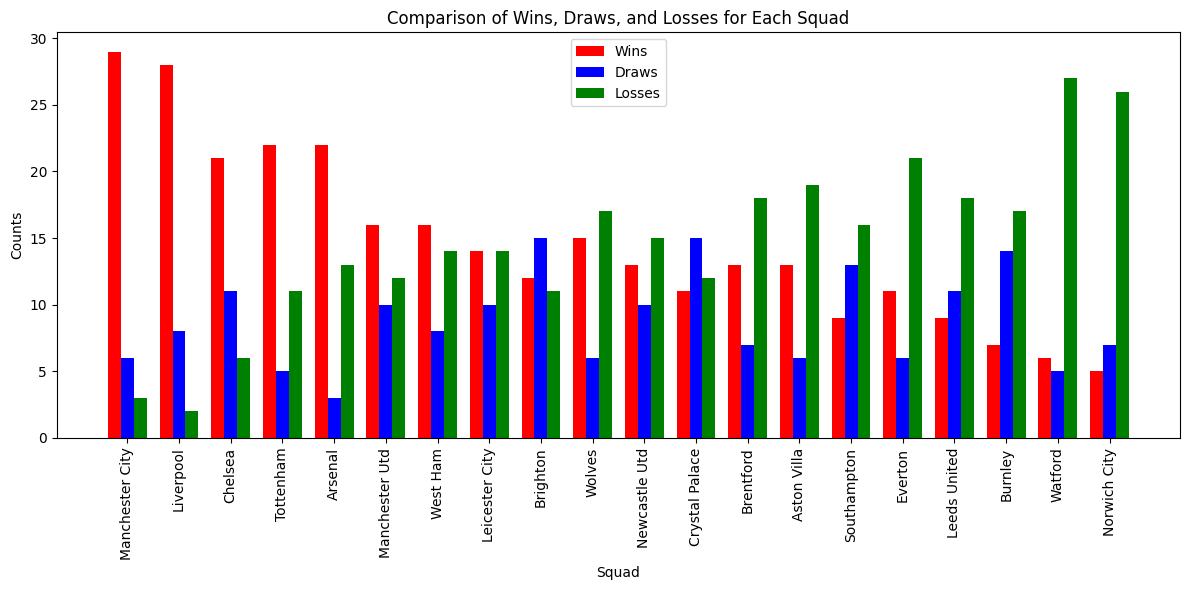

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the width of each bar
bar_width = 0.25

# Define the positions for the bars
indices = np.arange(len(df['Squad']))

# Create a bar plot
plt.figure(figsize=(12, 6))

# Plot the wins
plt.bar(indices - bar_width, df['W'], width=bar_width, color='red', label='Wins')

# Plot the draws
plt.bar(indices, df['D'], width=bar_width, color='blue', label='Draws')

# Plot the losses
plt.bar(indices + bar_width, df['L'], width=bar_width, color='green', label='Losses')

# Set labels, title, and legend
plt.xlabel('Squad')
plt.ylabel('Counts')
plt.title('Comparison of Wins, Draws, and Losses for Each Squad')
plt.xticks(indices, df['Squad'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


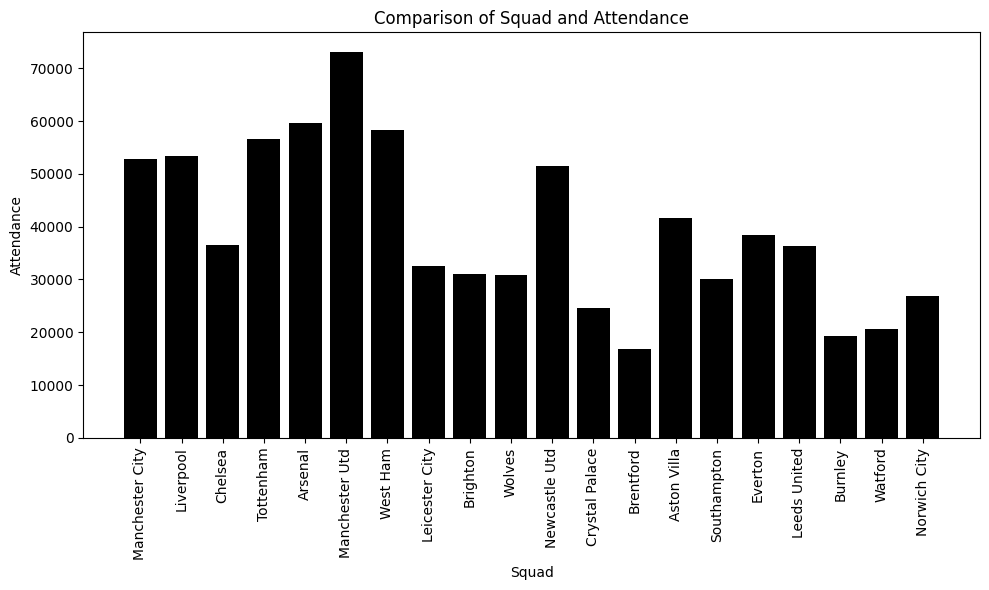

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Squad'], df['Attendance'], color='black')
plt.xlabel('Squad')
plt.ylabel('Attendance')
plt.title('Comparison of Squad and Attendance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

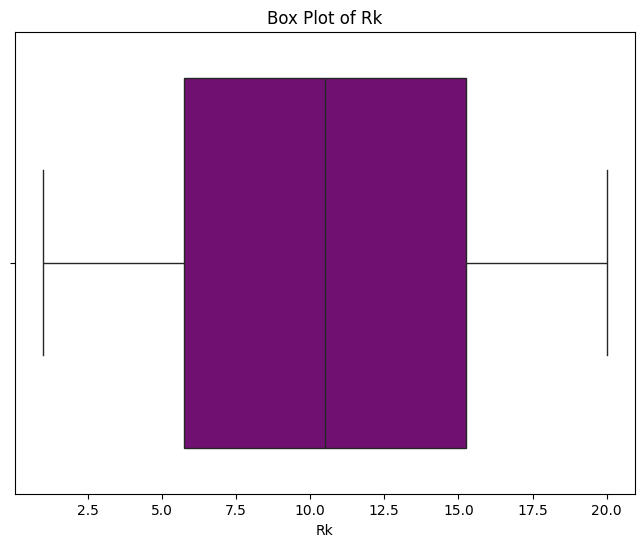

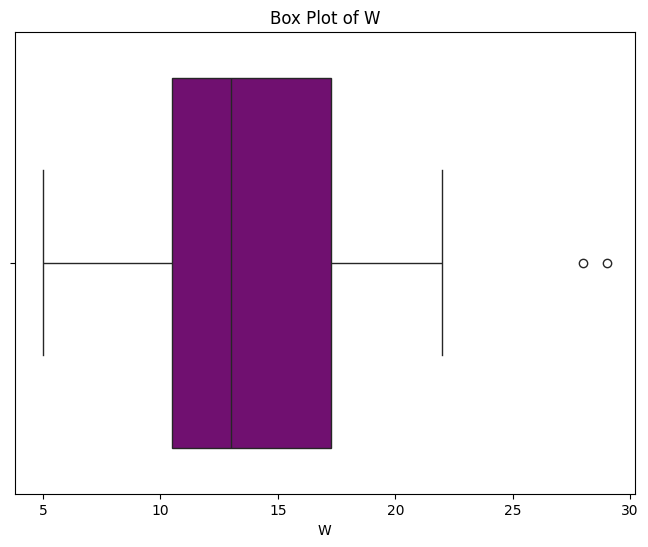

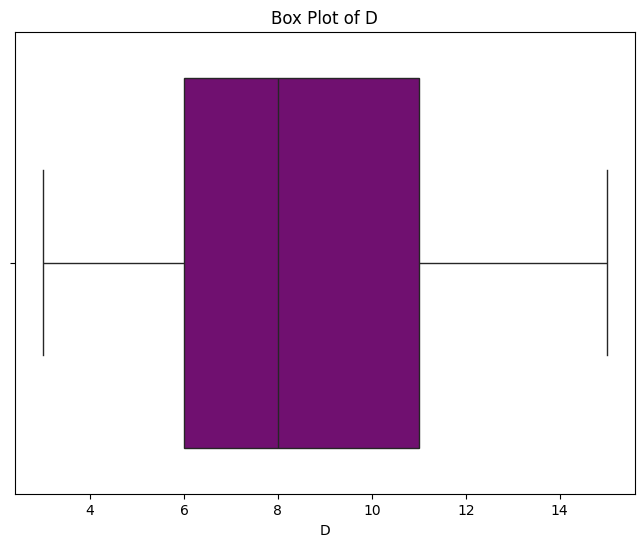

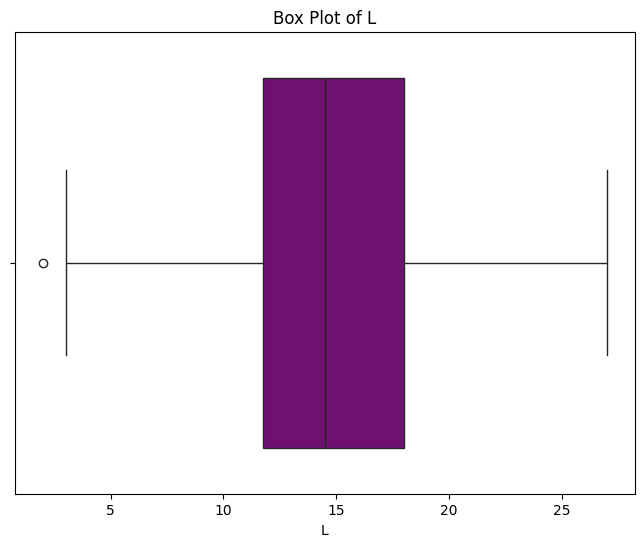

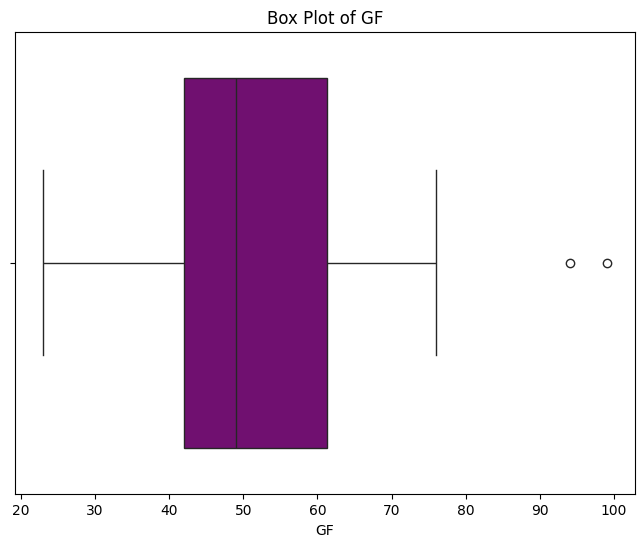

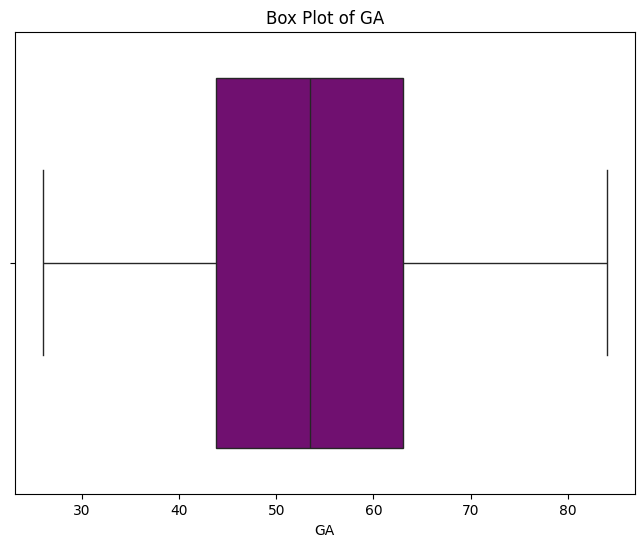

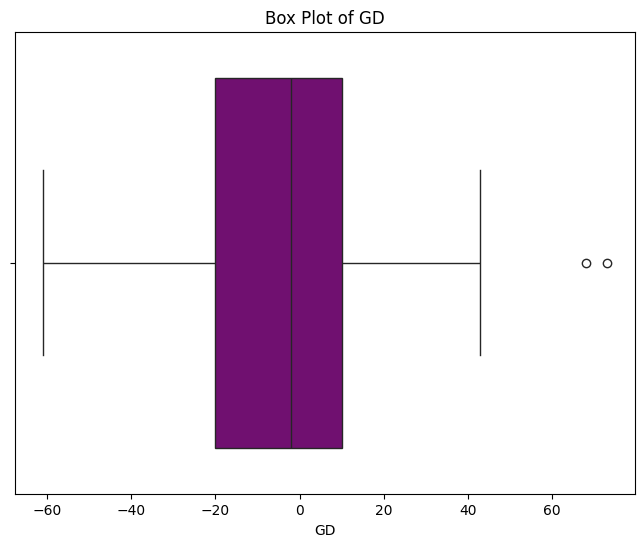

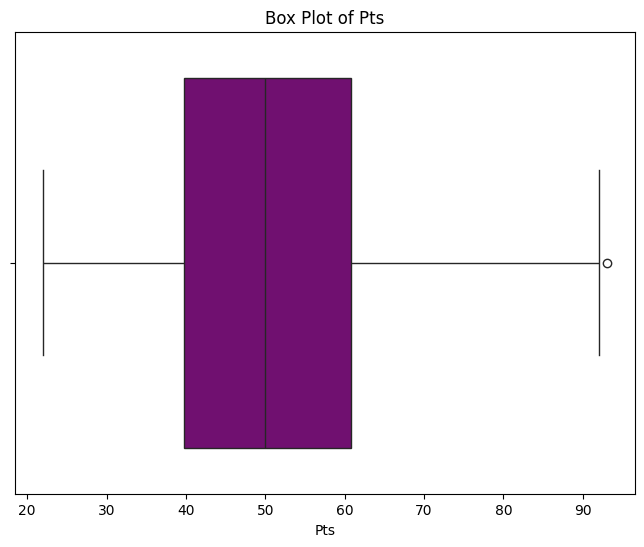

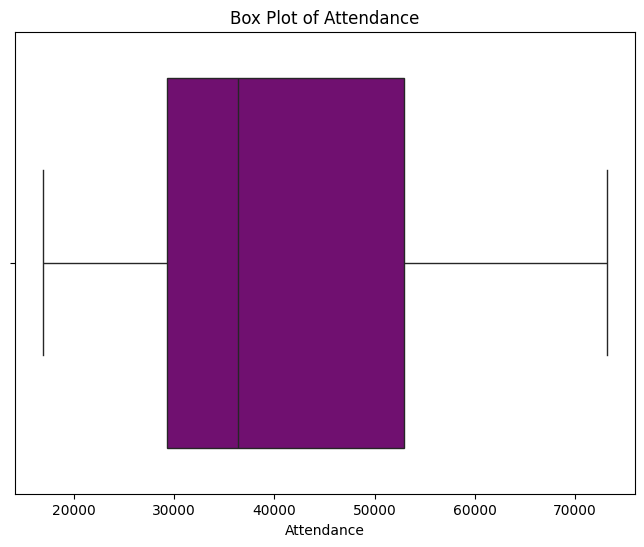

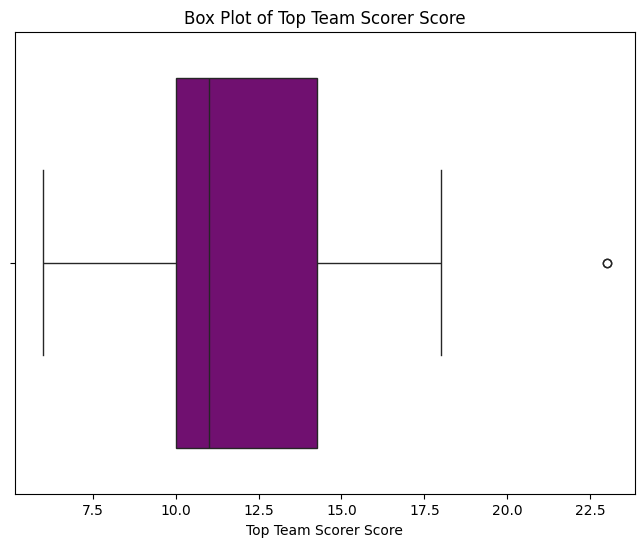

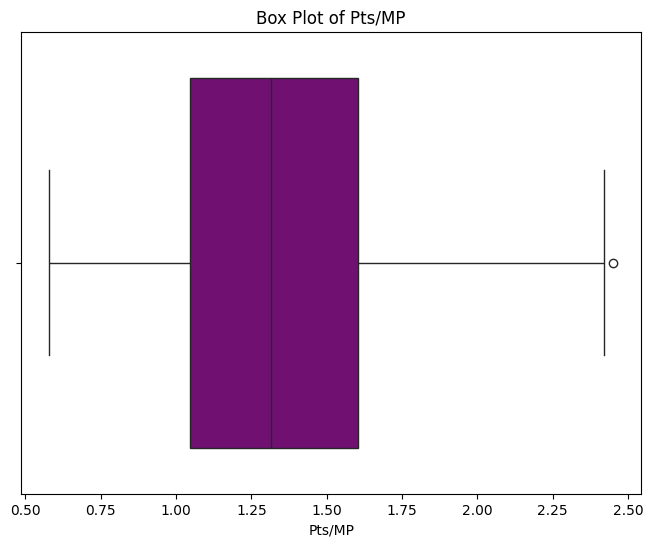

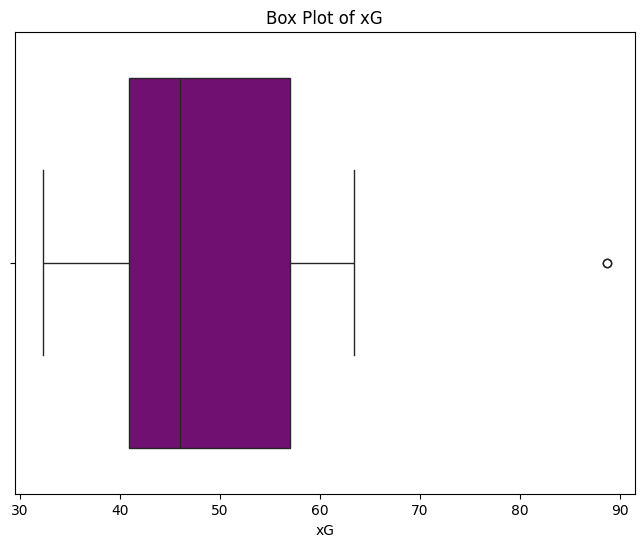

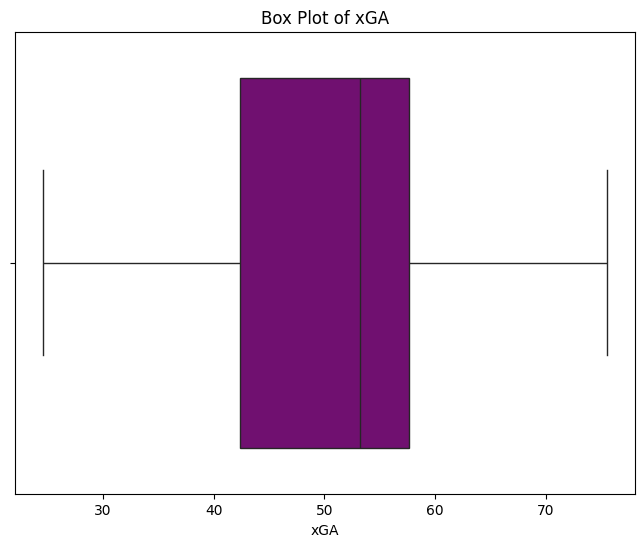

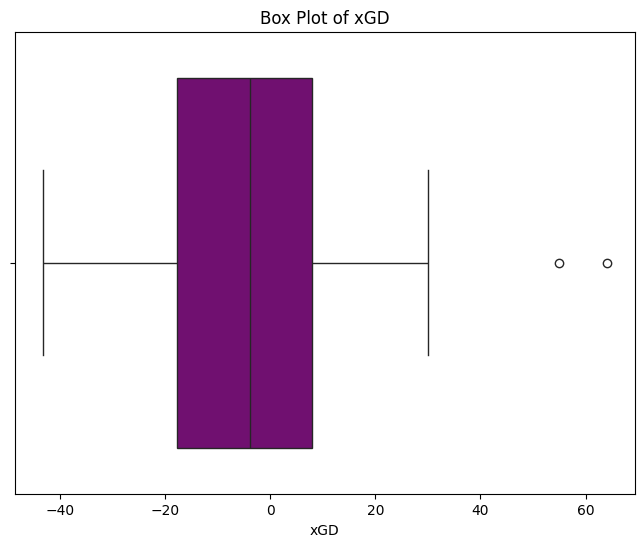

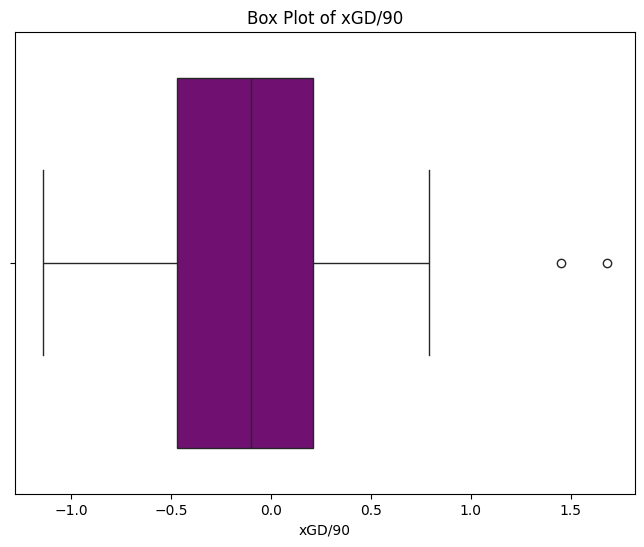

In [ ]:
import seaborn as sns


# Columns to visualize
columns_to_visualize = ['Rk', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Attendance', 'Top Team Scorer Score','Pts/MP','xG','xGA','xGD','xGD/90']

# Plot box plots for each column
for column in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], color='purple')
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

In [ ]:
columns = ['Rk', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Attendance', 'Top Team Scorer Score','Pts/MP','xG','xGA','xGD','xGD/90']


for column in columns:
  # Calculate the mean and standard deviation of the column
  mean = df[column].mean()
  std_dev = df[column].std()
  # Calculate the z-score for each data point
  df[f'{column}_z_score'] = (df[column] - mean) / std_dev

In [ ]:
for column in columns:
    # Calculate the z-scores for the current column
    df[f'{column}_z_score'] = (df[column] - df[column].mean()) / df[column].std()

    # Check for outliers with z-scores greater than 3 or less than -3
    outliers = df[(df[f'{column}_z_score'] > 3) | (df[f'{column}_z_score'] < -3)]

    # Print column name and outliers
    print(column)
    print("Outliers:")
    print(outliers)


Rk
Outliers:
Empty DataFrame
Columns: [Rk, Squad, MP, W, D, L, GF, GA, GD, Pts, Pts/MP, xG, xGA, xGD, xGD/90, Attendance, Goalkeeper, Notes, Top Team Scorer Name, Top Team Scorer Score, MatchOutcome, Rk_z_score, W_z_score, D_z_score, L_z_score, GF_z_score, GA_z_score, GD_z_score, Pts_z_score, Attendance_z_score, Top Team Scorer Score_z_score, Pts/MP_z_score, xG_z_score, xGA_z_score, xGD_z_score, xGD/90_z_score]
Index: []

[0 rows x 36 columns]
W
Outliers:
Empty DataFrame
Columns: [Rk, Squad, MP, W, D, L, GF, GA, GD, Pts, Pts/MP, xG, xGA, xGD, xGD/90, Attendance, Goalkeeper, Notes, Top Team Scorer Name, Top Team Scorer Score, MatchOutcome, Rk_z_score, W_z_score, D_z_score, L_z_score, GF_z_score, GA_z_score, GD_z_score, Pts_z_score, Attendance_z_score, Top Team Scorer Score_z_score, Pts/MP_z_score, xG_z_score, xGA_z_score, xGD_z_score, xGD/90_z_score]
Index: []

[0 rows x 36 columns]
D
Outliers:
Empty DataFrame
Columns: [Rk, Squad, MP, W, D, L, GF, GA, GD, Pts, Pts/MP, xG, xGA, xGD, xGD/

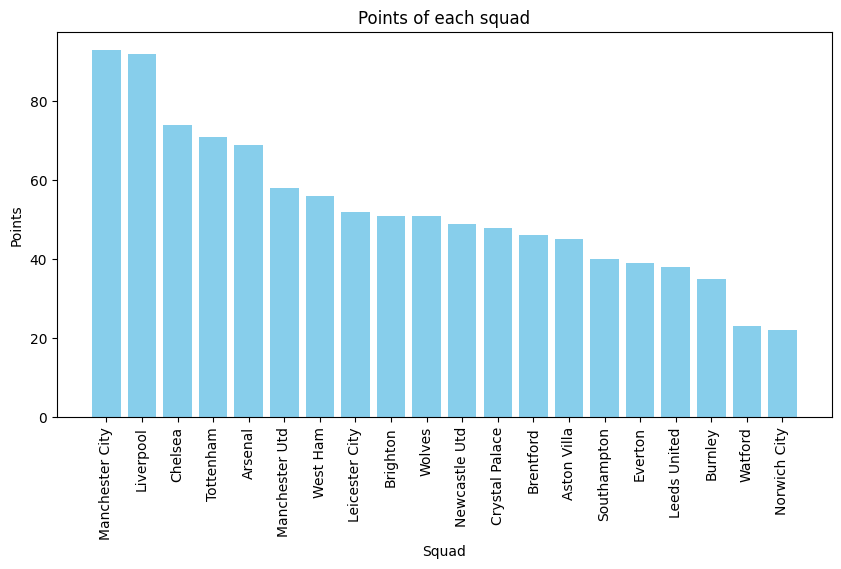

In [ ]:
plt.figure(figsize = (10,5))
plt.bar(df['Squad'],df['Pts'], color = 'skyblue')
plt.xlabel('Squad')
plt.ylabel('Points')
plt.xticks(rotation = 90)
plt.title('Points of each squad')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode team names using label encoding
df['Squad_encoded'] = label_encoder.fit_transform(df['Squad'])

# Encode 'Goalkeeper' using label encoding
df['Goalkeeper_encoded'] = label_encoder.fit_transform(df['Goalkeeper'])

# Encode 'Notes' using label encoding
df['Notes_encoded'] = label_encoder.fit_transform(df['Notes'])

# Encode 'Top Team Scorer Name' using label encoding
df['Top Team Scorer Name_encoded'] = label_encoder.fit_transform(df['Top Team Scorer Name'])


# Encode 'MatchOutcome' using label encoding
df['MatchOutcome_encoded'] = label_encoder.fit_transform(df['MatchOutcome'])





In [ ]:
print(df.keys())

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance', 'Goalkeeper', 'Notes',
       'Top Team Scorer Name', 'Top Team Scorer Score', 'MatchOutcome',
       'Rk_z_score', 'W_z_score', 'D_z_score', 'L_z_score', 'GF_z_score',
       'GA_z_score', 'GD_z_score', 'Pts_z_score', 'Attendance_z_score',
       'Top Team Scorer Score_z_score', 'Pts/MP_z_score', 'xG_z_score',
       'xGA_z_score', 'xGD_z_score', 'xGD/90_z_score', 'Squad_encoded',
       'Goalkeeper_encoded', 'Notes_encoded', 'Top Team Scorer Name_encoded',
       'MatchOutcome_encoded'],
      dtype='object')


In [ ]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Select original numerical columns (excluding columns with '_z_score' suffix)
original_numerical_columns = [col for col in df.columns if '_z_score' not in col and np.issubdtype(df[col].dtype, np.number)]

# Extract the dependent variable (y)
y = df['Pts']

# Initialize lists to store results
pearson_results = []
spearman_results = []

# Iterate through each original numerical independent variable
for column in original_numerical_columns:
    # Compute Pearson correlation coefficient and p-value
    pearson_corr, pearson_pval = pearsonr(df[column], y)
    pearson_results.append((column, pearson_corr, pearson_pval))

    # Compute Spearman correlation coefficient and p-value
    spearman_corr, spearman_pval = spearmanr(df[column], y)
    spearman_results.append((column, spearman_corr, spearman_pval))

# Print results
print("Pearson Correlation Results:")
for result in pearson_results:
    print(f"{result[0]}: Correlation = {result[1]}, p-value = {result[2]}")
print()
print("\nSpearman Correlation Results:")
for result in spearman_results:
    print(f"{result[0]}: Correlation = {result[1]}, p-value = {result[2]}")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Pearson Correlation Results:
Rk: Correlation = -0.9532992417132524, p-value = 8.466900102090763e-11
MP: Correlation = nan, p-value = nan
W: Correlation = 0.9852221758728887, p-value = 3.0259604557326343e-15
D: Correlation = -0.18140895094896553, p-value = 0.444014452443004
L: Correlation = -0.9333146853688116, p-value = 1.9412402531146335e-09
GF: Correlation = 0.9505839140013742, p-value = 1.394093797859545e-10
GA: Correlation = -0.8856864874715131, p-value = 2.0763695886171349e-07
GD: Correlation = 0.9714087916527846, p-value = 1.0931185494551855e-12
Pts: Correlation = 1.0, p-value = 0.0
Pts/MP: Correlation = 0.9999854243327124, p-value = 2.8195397495572514e-42
xG: Correlation = 0.9286967067829871, p-value = 3.486262161643356e-09
xGA: Correlation = -0.8705952014437813, p-value = 5.985872838159663e-07
xGD: Correlation = 0.9475410958587438, p-value = 2.360419780987262e-10
xGD/90: Correlation = 0.9472844244974428, p-value = 2.4640901683261734e-10
Attendance: Correlation = 0.6211451199741

Corralation and p_value

In [ ]:


# Create DataFrames from the results
pearson_df = pd.DataFrame(pearson_results, columns=['Variable', 'Pearson Correlation', 'Pearson p-value'])
spearman_df = pd.DataFrame(spearman_results, columns=['Variable', 'Spearman Correlation', 'Spearman p-value'])

# Merge the two DataFrames on the 'Variable' column
correlation_df = pd.merge(pearson_df, spearman_df, on='Variable')

# Print the resulting DataFrame
print(correlation_df)


                        Variable  Pearson Correlation  Pearson p-value  \
0                             Rk            -0.953299     8.466900e-11   
1                             MP                  NaN              NaN   
2                              W             0.985222     3.025960e-15   
3                              D            -0.181409     4.440145e-01   
4                              L            -0.933315     1.941240e-09   
5                             GF             0.950584     1.394094e-10   
6                             GA            -0.885686     2.076370e-07   
7                             GD             0.971409     1.093119e-12   
8                            Pts             1.000000     0.000000e+00   
9                         Pts/MP             0.999985     2.819540e-42   
10                            xG             0.928697     3.486262e-09   
11                           xGA            -0.870595     5.985873e-07   
12                           xGD      

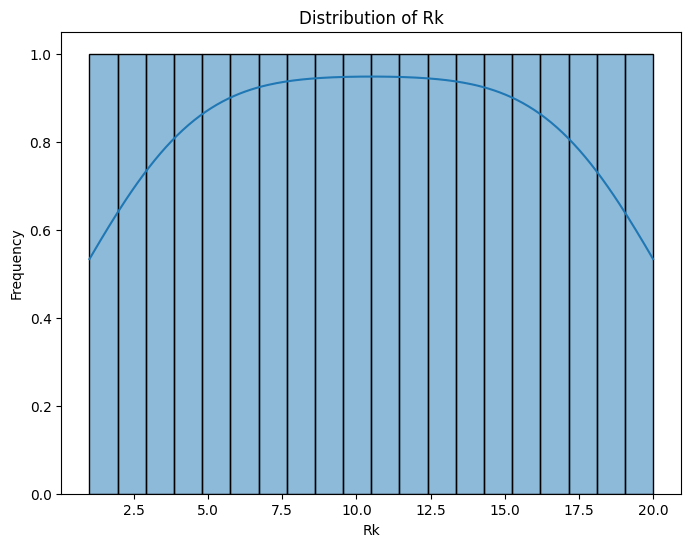

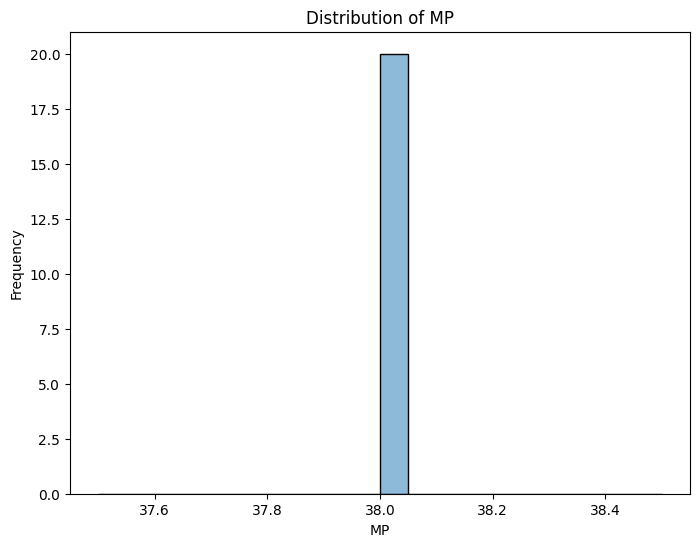

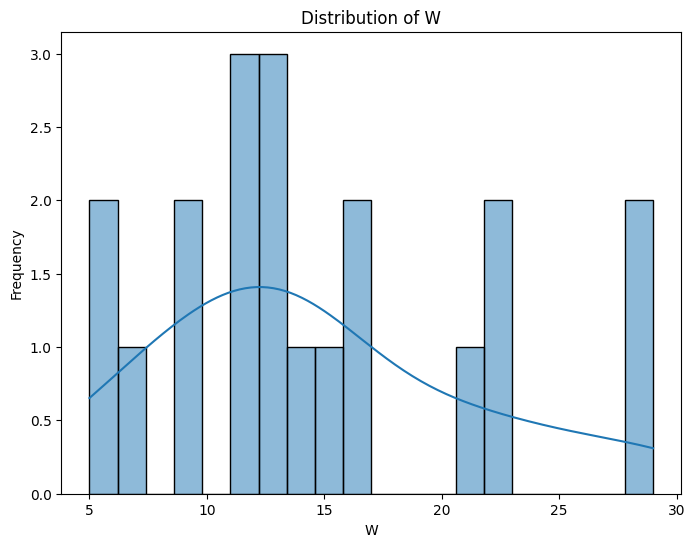

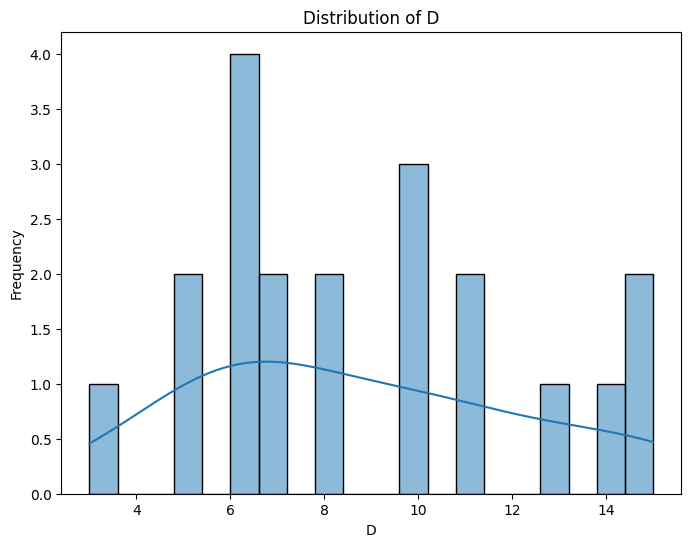

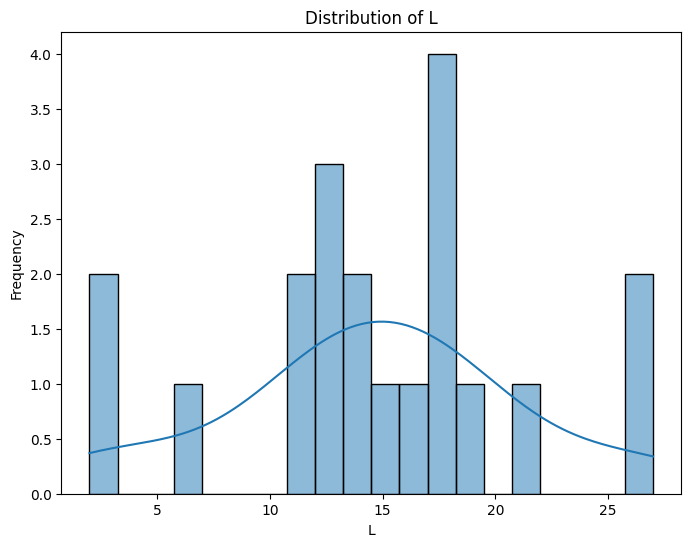

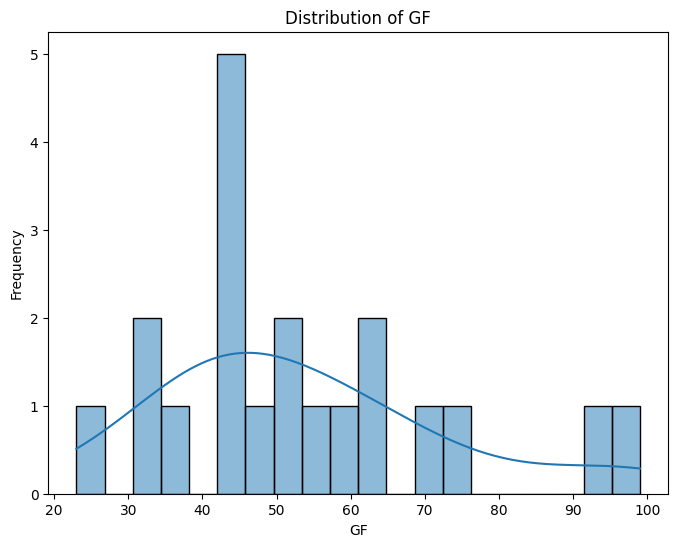

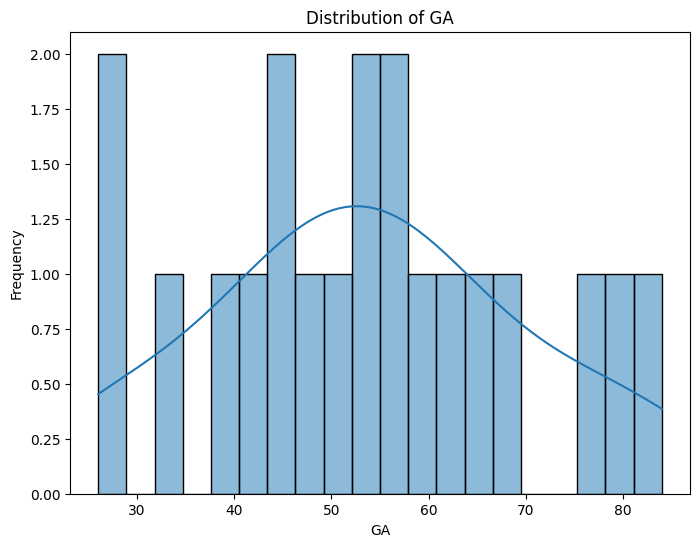

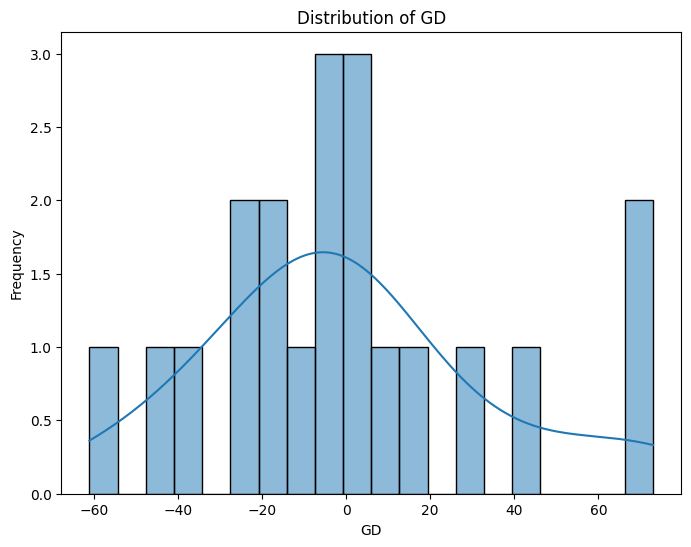

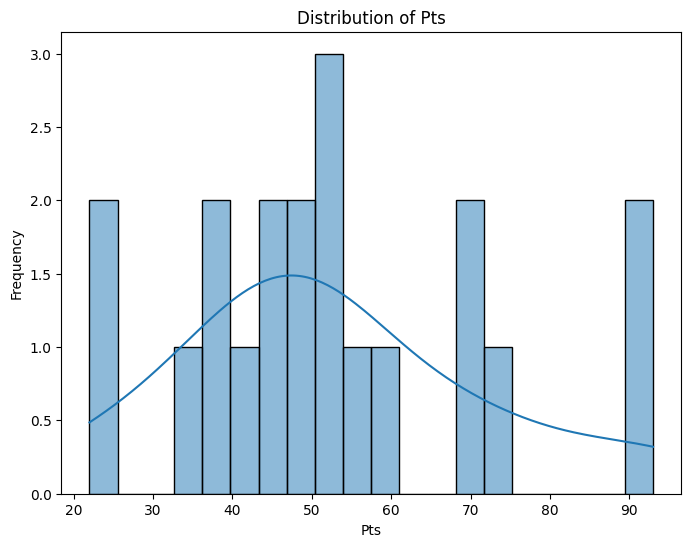

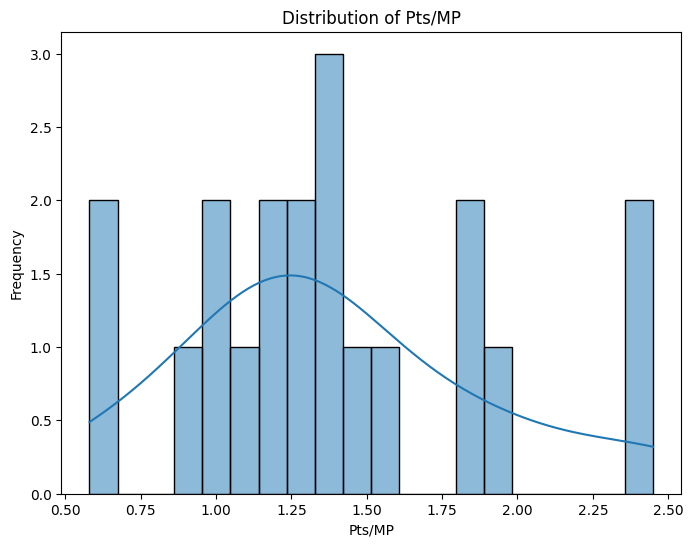

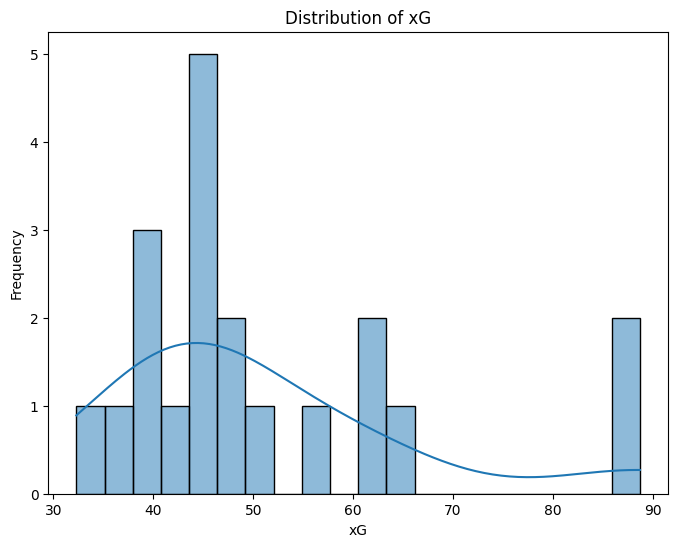

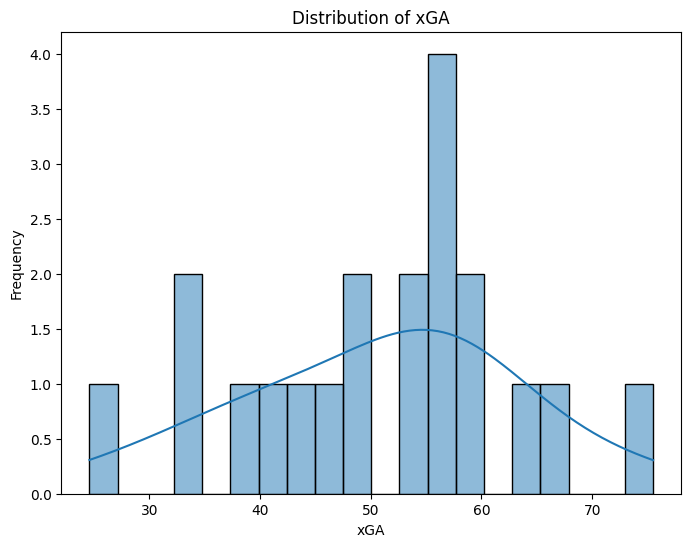

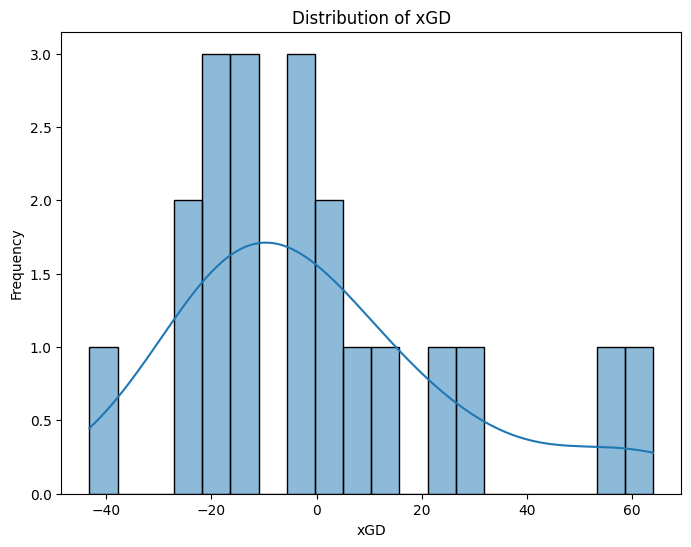

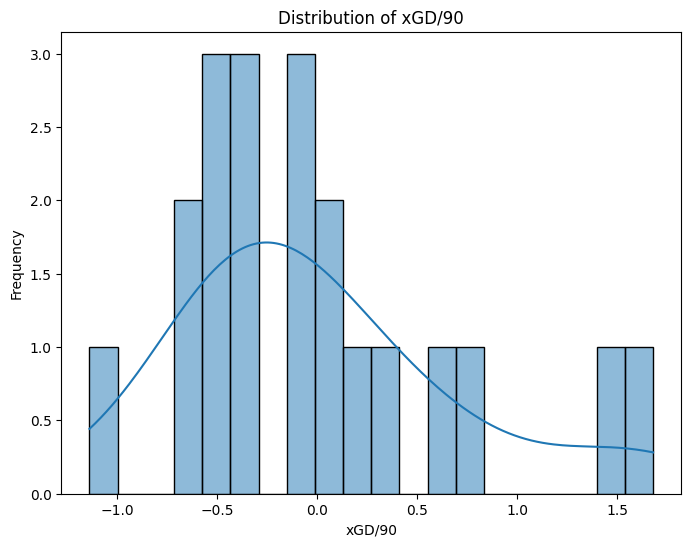

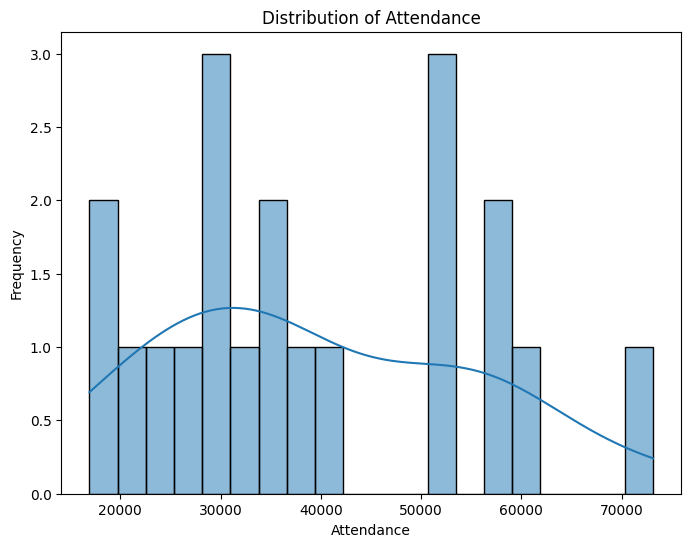

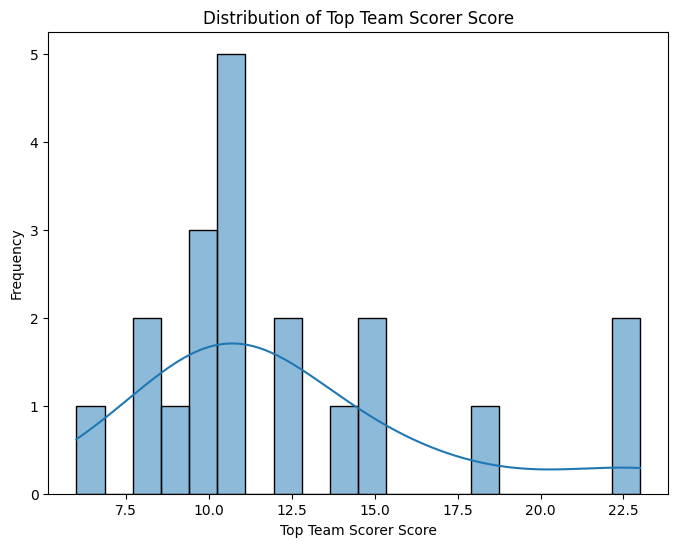

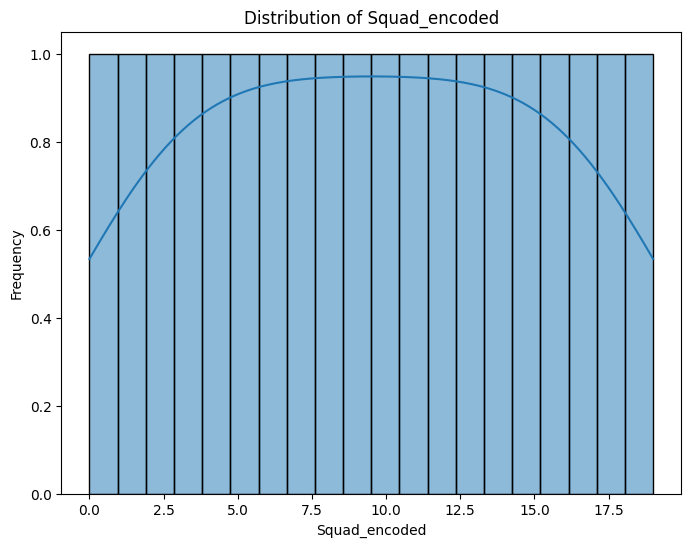

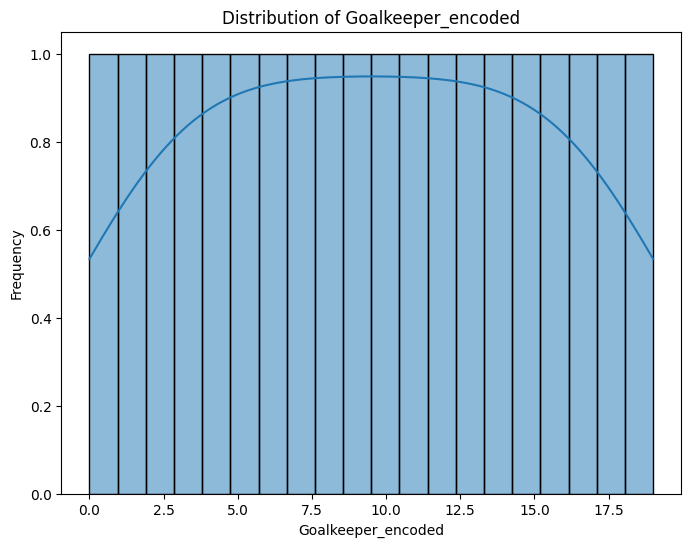

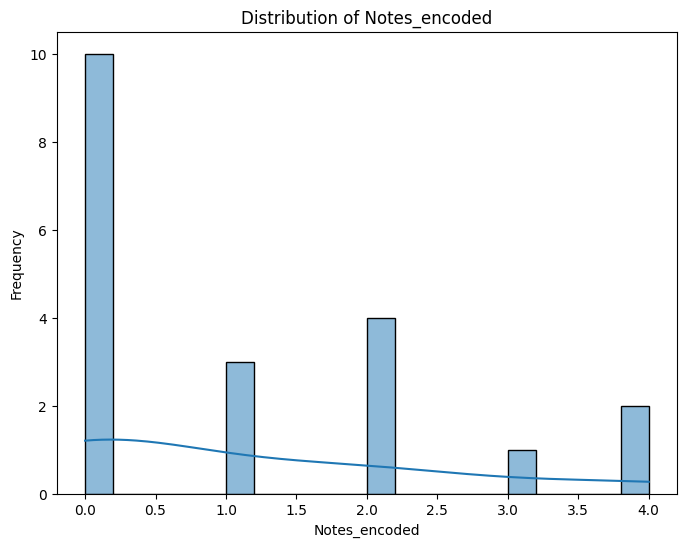

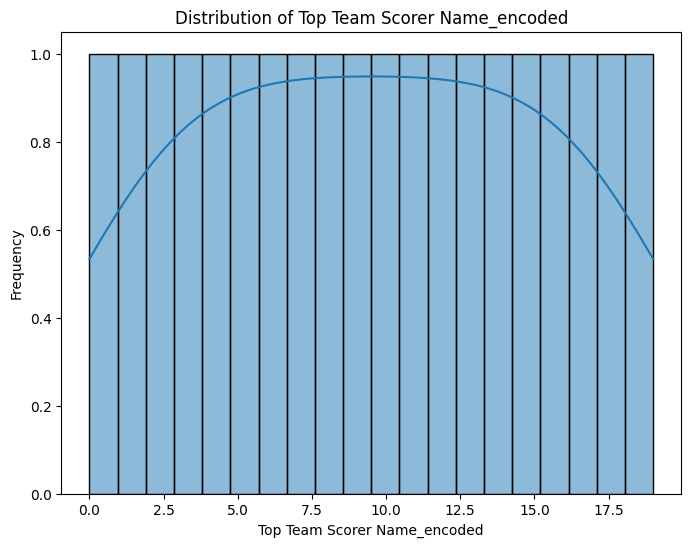

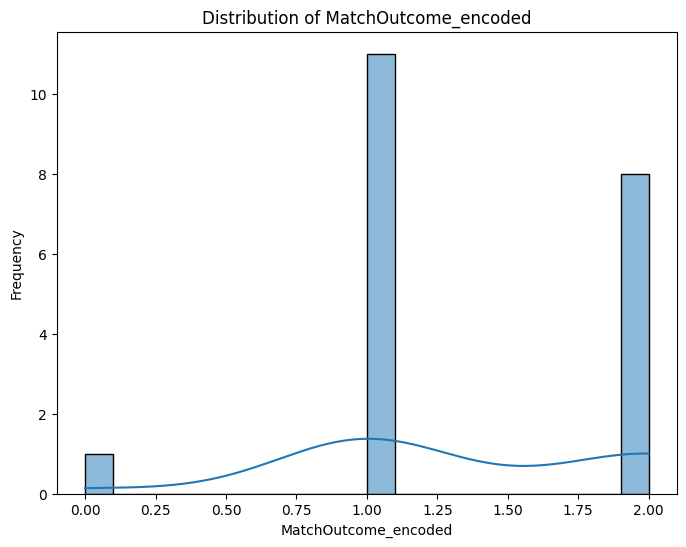

In [ ]:
# Identify numerical columns that are not z-scores and are encoded with label encoding
columns = [col for col in df.columns if '_z_score' not in col
                                  and df[col].dtype in [np.int64, np.float64]]

# Subset the DataFrame to include only label-encoded numerical columns
numeric_df = df[columns]

# Visualize the distributions of the label-encoded numerical variables
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(numeric_df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



In [ ]:
import scipy.stats as stats

# Select numerical columns that are not z-scores and are encoded with label encoding
numeric_columns = [col for col in df.columns if '_z_score' not in col
                   and df[col].dtype in [np.int64, np.float64]]

# Perform Q-Q test for each numerical variable
for column in numeric_columns:
    # Perform Q-Q test and get the Kolmogorov-Smirnov statistic and p-value
    p_value = stats.probplot(df[column], dist="norm", plot=None)
    # Interpret the results
    alpha = 0.05  # Set significance level
    if p_value[1][2] < alpha:
      print(f"{column}: The data does not follow a normal distribution (p-value = {p_value[1][2]})")
    else:
      print(f"{column}: The data follows a normal distribution (p-value = {p_value[1][2]})")
    print()

Rk: The data follows a normal distribution (p-value = 0.9895601797844538)

MP: The data does not follow a normal distribution (p-value = 0.0)

W: The data follows a normal distribution (p-value = 0.9683049287461427)

D: The data follows a normal distribution (p-value = 0.974792776979354)

L: The data follows a normal distribution (p-value = 0.9814258029431279)

GF: The data follows a normal distribution (p-value = 0.959386822112787)

GA: The data follows a normal distribution (p-value = 0.9922177787930919)

GD: The data follows a normal distribution (p-value = 0.9726937542902938)

Pts: The data follows a normal distribution (p-value = 0.9720651101550679)

Pts/MP: The data follows a normal distribution (p-value = 0.9720715803699231)

xG: The data follows a normal distribution (p-value = 0.9046263877298665)

xGA: The data follows a normal distribution (p-value = 0.9915092493378949)

xGD: The data follows a normal distribution (p-value = 0.9539217958779909)

xGD/90: The data follows a nor

In [ ]:
#printing the correlation that we calculated in previous snippets
print(correlation_df)

                        Variable  Pearson Correlation  Pearson p-value  \
0                             Rk            -0.953299     8.466900e-11   
1                             MP                  NaN              NaN   
2                              W             0.985222     3.025960e-15   
3                              D            -0.181409     4.440145e-01   
4                              L            -0.933315     1.941240e-09   
5                             GF             0.950584     1.394094e-10   
6                             GA            -0.885686     2.076370e-07   
7                             GD             0.971409     1.093119e-12   
8                            Pts             1.000000     0.000000e+00   
9                         Pts/MP             0.999985     2.819540e-42   
10                            xG             0.928697     3.486262e-09   
11                           xGA            -0.870595     5.985873e-07   
12                           xGD      

In [ ]:
#Going with Spearman correlation according to the data nature
x_columns = []
for index, value in correlation_df['Spearman Correlation'].items():
    if abs(value) > 0.5:
        print(f"{correlation_df.at[index, 'Variable']} is correlated")
        x_columns.append(correlation_df.at[index, 'Variable'])

print(x_columns)



Rk is correlated
W is correlated
L is correlated
GF is correlated
GA is correlated
GD is correlated
Pts is correlated
Pts/MP is correlated
xG is correlated
xGA is correlated
xGD is correlated
xGD/90 is correlated
Attendance is correlated
Top Team Scorer Score is correlated
Notes_encoded is correlated
MatchOutcome_encoded is correlated
['Rk', 'W', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance', 'Top Team Scorer Score', 'Notes_encoded', 'MatchOutcome_encoded']


In [ ]:
x_columns.remove('Pts')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[x_columns], df['Pts'], test_size=0.2, random_state=42)





# Define a set of models for comparison
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Calculate accuracy (for regression, typically R-squared is used instead of accuracy)
    accuracy = r2_score(y_test, y_pred)



    print(f"{name}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R^2): {r2}")
    print(f"Accuracy: {accuracy}")
    print()



Random Forest:
Mean Squared Error (MSE): 228.50502500000007
Root Mean Squared Error (RMSE): 15.116382669144098
Mean Absolute Error (MAE): 12.167500000000002
R-squared (R^2): 0.7040809065155806
Accuracy: 0.7040809065155806

Gradient Boosting:
Mean Squared Error (MSE): 181.17627775325167
Root Mean Squared Error (RMSE): 13.460173763858016
Mean Absolute Error (MAE): 11.145503838129981
R-squared (R^2): 0.7653726876526081
Accuracy: 0.7653726876526081

Linear Regression:
Mean Squared Error (MSE): 1.0156026272288355e-22
Root Mean Squared Error (RMSE): 1.007771118473255e-11
Mean Absolute Error (MAE): 8.688161301506625e-12
R-squared (R^2): 1.0
Accuracy: 1.0

Ridge Regression:
Mean Squared Error (MSE): 0.028764638686276475
Root Mean Squared Error (RMSE): 0.16960141121546268
Mean Absolute Error (MAE): 0.13885544943077477
R-squared (R^2): 0.9999627491526524
Accuracy: 0.9999627491526524



In [ ]:
selected_model_1 = models['Linear Regression']
selected_model_2 = models['Ridge Regression']

# Features of the new data  to make predictions on
new_data_features = df[x_columns]

# Make predictions using the selected models
predictions_1 = selected_model_1.predict(new_data_features)
predictions_2 = selected_model_2.predict(new_data_features)


# Print predictions
print(predictions_1)
print(predictions_2)




[93. 92. 74. 71. 69. 58. 56. 52. 51. 51. 49. 48. 46. 45. 40. 39. 38. 35.
 23. 22.]
[93.23806893 92.09075485 73.93096001 70.9596935  68.88372734 58.05058731
 56.16288445 52.10675885 51.21137579 50.92260067 48.87541426 47.95620925
 45.83763199 45.07545642 40.01501051 39.00268263 37.87782741 34.77608461
 23.26026216 21.87360007]


In [ ]:
# Find the index of the team with the highest predicted points
winner_index_1 = predictions_1.argmax()
winner_index_2 = predictions_2.argmax()


# Get the name of the winning team
winner_1 = df.iloc[winner_index_1]['Squad']
winner_2 = df.iloc[winner_index_2]['Squad']


print(f"The predicted winner is: {winner_1}")
print(f"The predicted winner is: {winner_2}")


The predicted winner is: Manchester City
The predicted winner is: Manchester City
